# Neste Notebook a ideia é a siguinte:
    1-Dividir textos por Cláusulas
    2-Treinar um Clasificador de textos SVC
    3-Verificar matriz de confução.

In [1]:
import pickle
import pandas as pd
import re

In [2]:
'''carrega o arquivo pickle que contém todos os textos de cada documento,
 divide-os por cláusulas e coloca cada seção do documento com sua respectiva 
 cláusula dentro de um dataframe.'''

all_docs = pd.read_pickle('docs_df.pkl')
df2=pd.DataFrame({'textos':0,'clausulas':0},index=[])
for t in all_docs['texto']:
    pattern = re.compile('CLÁUSULA\s.*\n[\w\s]+?\n\n')
    matches = re.findall(pattern,t)
    matches.insert(0,'titulo')
    indices = []
    for texto in matches:
        texto = re.sub('\n', ' ',texto)
        indices.append(texto)
    #print(texto)
    df1 = pd.DataFrame({'textos':t.split('CLÁUSULA'), 'clausulas':indices})
    df2 = df2.append(df1,ignore_index=True)
df2.head(15)

,textos,clausulas
0,INSTRUMENTO PARTICULAR DE ESCRITURA DA 1ª (PRI...,titulo
1,I\nAUTORIZAÇÕES\n\nAutorização da Emissão e d...,CLÁUSULA I AUTORIZAÇÕES
2,II\nREQUISITOS\n\nA presente 1ª (primeira) em...,CLÁUSULA II REQUISITOS
3,III\nOBJETO SOCIAL DA EMISSORA E CARACTERÍSTI...,CLÁUSULA III OBJETO SOCIAL DA EMISSORA E CARAC...
4,IV\nCARACTERÍSTICAS DAS DEBÊNTURES\n\nCaracte...,CLÁUSULA IV CARACTERÍSTICAS DAS DEBÊNTURES
5,V\nVENCIMENTO ANTECIPADO\n\nObservado o dispo...,CLÁUSULA V VENCIMENTO ANTECIPADO
6,VI\nOBRIGAÇÕES ADICIONAIS DA EMISSORA\n\nObri...,CLÁUSULA VI OBRIGAÇÕES ADICIONAIS DA EMISSORA
7,VII\nAGENTE FIDUCIÁRIO\n\nNomeação\n\nA Emiss...,CLÁUSULA VII AGENTE FIDUCIÁRIO
8,VIII\nASSEMBLEIA GERAL DE DEBENTURISTAS\n\nDi...,CLÁUSULA VIII ASSEMBLEIA GERAL DE DEBENTURISTAS
9,IX\nDECLARAÇÕES E GARANTIAS DA EMISSORA\n\nA ...,CLÁUSULA IX DECLARAÇÕES E GARANTIAS DA EMISSORA


In [3]:
#len(df2)

In [4]:
#df2[df2['clausulas']=='titulo']

In [5]:
#import numpy as np

df2

In [6]:
#df2.isnull().sum()

# Criação de modelo

In [7]:

from sklearn.model_selection import train_test_split

In [8]:
# Carregando os dados para treinar o modelo
X = df2['textos']
y = df2['clausulas']

In [9]:
# eparação dos datos de trinamento e predição
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=55)
X_test

3      III\nOBJETO SOCIAL DA EMISSORA E CARACTERÍSTI...
4      IV\nCARACTERÍSTICAS DAS DEBÊNTURES\n\nCaracte...
22    INSTRUMENTO PARTICULAR DE ESCRITURA DA 1ª (PRI...
42     IX\nDECLARAÇÕES E GARANTIAS DA EMISSORA\n\nA ...
53     IX\nDECLARAÇÕES E GARANTIAS DA EMISSORA\n\nA ...
5      V\nVENCIMENTO ANTECIPADO\n\nObservado o dispo...
15     IV\nCARACTERÍSTICAS DAS DEBÊNTURES\n\nCaracte...
6      VI\nOBRIGAÇÕES ADICIONAIS DA EMISSORA\n\nObri...
48     IV\nCARACTERÍSTICAS DAS DEBÊNTURES\n\nCaracte...
52     VIII\nASSEMBLEIA GERAL DE DEBENTURISTAS\n\nDi...
38     V\nVENCIMENTO ANTECIPADO\n\nObservado o dispo...
Name: textos, dtype: object

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [11]:
# Criando Pipline para ajustar modelo
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [12]:
#ajuste/fit do modelo
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [13]:
# realizando predições
predictions = text_clf.predict(X_test)


In [14]:
#Confusion Matrix...
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [15]:
print(confusion_matrix(y_test,predictions))

[[1 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


In [16]:
print(classification_report(y_test,predictions))

                                                                       precision    recall  f1-score   support

CLÁUSULA III OBJETO SOCIAL DA EMISSORA E CARACTERÍSTICAS DA EMISSÃO         1.00      1.00      1.00         1
                         CLÁUSULA IV CARACTERÍSTICAS DAS DEBÊNTURES         1.00      1.00      1.00         3
                    CLÁUSULA IX DECLARAÇÕES E GARANTIAS DA EMISSORA         1.00      1.00      1.00         2
                                   CLÁUSULA V VENCIMENTO ANTECIPADO         1.00      1.00      1.00         2
                      CLÁUSULA VI OBRIGAÇÕES ADICIONAIS DA EMISSORA         1.00      1.00      1.00         1
                    CLÁUSULA VIII ASSEMBLEIA GERAL DE DEBENTURISTAS         1.00      1.00      1.00         1
                                                               titulo       1.00      1.00      1.00         1

                                                             accuracy                           1.00        11

In [17]:
text_clf.predict(['INSTRUMENTO PARTICULAR DE ESCRITURA DA 1ª (PRIMEIRA) EMISSÃO DE DEBÊNTURES SIMPLES, NÃO CONVERSÍVEIS EM AÇÕES, DA ESPÉCIE COM GARANTIA REAL, COM GARANTIA ADICIONAL FIDEJUSSÓRIA, EM SÉRIE ÚNICA, PARA DISTRIBUIÇÃO PÚBLICA COM ESFORÇOS RESTRITOS, DA TIBAGI ENERGIA SPE S.A. \n\nPelo presente instrumento,\n\nTIBAGI ENERGIA SPE S.A., sociedade por ações de capital fechado, com sede na Cidade de Belo Horizonte, Estado de Minas Gerais, na Avenida Getúlio Vargas, nº 874, 10º andar, Sala 1006, inscrita no Cadastro Nacional de Pessoa Jurídica do Ministério da Economia (“CNPJ”) sob o nº 23.080.281/0001-35 e na Junta Comercial do Estado de Minas Gerais (“JUCEMG”) sob o NIRE nº [•], neste ato representada por seu(s) representante(s) legal(is) devidamente autorizado(s) e identificado(s) nas páginas de assinaturas do presente instrumento (“Emissora” ou “Companhia”); e\n\nOLIVEIRA TRUST DTVM S.A., instituição financeira autorizada a exercer as funções de agente fiduciário, com sede na Cidade e Estado do Rio de Janeiro, na Avenida das Américas, nº 3434, Bloco 7 - , inscrita no CNPJ sob o nº 36.113.876/0001-91, neste ato representada por seu(s) representante(s) legal(is) devidamente autorizado(s) e identificado(s) nas páginas de assinaturas do presente instrumento (“Agente Fiduciário”), representando a comunhão dos titulares das debêntures desta emissão\xa0(“Debenturistas” e, individua'])

array(['titulo'], dtype=object)

In [18]:
text_clf.predict([' eventuais aditamentos na Junta Comercial\n\nEsta Escritura de Emissão será arquivada e seus eventuais aditamentos serão averbados na JUCEMG, conforme disposto no artigo 62, inciso II e parágrafo 3º, da Lei das Sociedades por Ações. A Emissora entregará ao Agente Fiduciário 1 (uma) via original desta Escritura de Emissão e de eventuais aditamentos arquivados na JUCEMG em até 5 (cinco) Dias Úteis após o respectivo arquivamento.\n\nDispensa de Registro na CVM e Registro na ANBIMA – Associação Brasileira das Entidades dos Mercados Financeiro e de Capitais\n\nA Emissão será realizada nos termos da Instrução CVM 476 e das demais disposições legais e regulamentares aplicáveis, estando, portanto, automaticamente dispensada do registro de distribuição de que trata o artigo 19 da Lei nº 6.385, de 7 de dezembro de 1976, conforme alterada (“Lei do Mercado de Valores Mobiliários”), por se tratar de oferta pública de valores mobiliários, com esforços restritos, não sendo objeto de protocolo, registro e/ou arquivamento perante a CVM, exceto pelo envio da comunicação sobre o início da Oferta Restrita e a comunicação de seu encerramento à CVM, nos termos dos artigos 7º-A e 8º, respectivamente, da Instrução CVM 476.\n\nPor se tratar de distribuição pública com esforços restritos, a Oferta Restrita poderá vir a ser registrada na Associação Brasileira das Entidades dos Mercados Financeiros e de Capitais (“ANBIMA”), nos termos do parágrafo 2º do artigo\xa01° do “Código ANBIMA de Regulação e Melhores Práticas para as Ofertas Públicas de Distribuição e Aquisição de Valores Mobiliários” atualmente em vigor, exclusivamente para fins de envio de informações para a base de dados da ANBIMA, desde que sejam expedidas diretrizes específicas nesse '])

array(['CLÁUSULA II REQUISITOS  '], dtype=object)

In [19]:
text_clf.predict(['''alienação fiduciária, pelas Acionistas da totalidade das ações representativas do capital social da Emissora, que venham a ser subscritas ou de qualquer forma adquiridas por qualquer das Acionistas, seja na forma dos artigos 166, 167, 169 e 170 da Lei das Sociedades por Ações, seja por força de desmembramentos ou grupamentos das ações, seja por consolidação, fusão, permuta de ações, divisão de ações, reorganização societária ou sob qualquer outra forma, quer substituam ou não as ações originalmente alienadas, abrangendo também (a) todos os frutos, lucros, rendimentos, bonificações, distribuições e demais direitos, inclusive dividendos, reduções de capital e juros sobre o capital próprio, em dinheiro ou mediante distribuição de novas ações que venham a ser apurados, declarados e ainda não pagos, creditados ou pagos pela Emissora, bem como debêntures conversíveis, partes beneficiárias ou outros valores mobiliários conversíveis em ações, além de direitos de preferência e opções, que venham a ser por elas subscritos ou adquiridos até a liquidação das obrigações garantidas; (b) todos os valores e bens recebidos ou, de qualquer outra forma, distribuídos à Emissora a título de qualquer cobrança, permuta, venda ou qualquer outra forma de disposição de qualquer das ações, de quaisquer bens ou títulos nos quais as ações tenham sido convertidas e de quaisquer outros bens ou títulos sujeitos à alienação fiduciária ora referida, incluindo qualquer depósito, valor mobiliário ou título negociável; e (c) todos os títulos, valores mobiliários, respectivos rendimentos e quaisquer outros bens ou direitos eventualmente adquiridos pela Emissora com o produto da realização dos bens objeto da garantia mencionada nos itens (a) e (b) acima, tudo nos termos previstos em contrato de alienação fiduciária de ações a'''])

array(['CLÁUSULA IX DECLARAÇÕES E GARANTIAS DA EMISSORA  '], dtype=object)

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


C:\Users\manuel.Cabrera\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


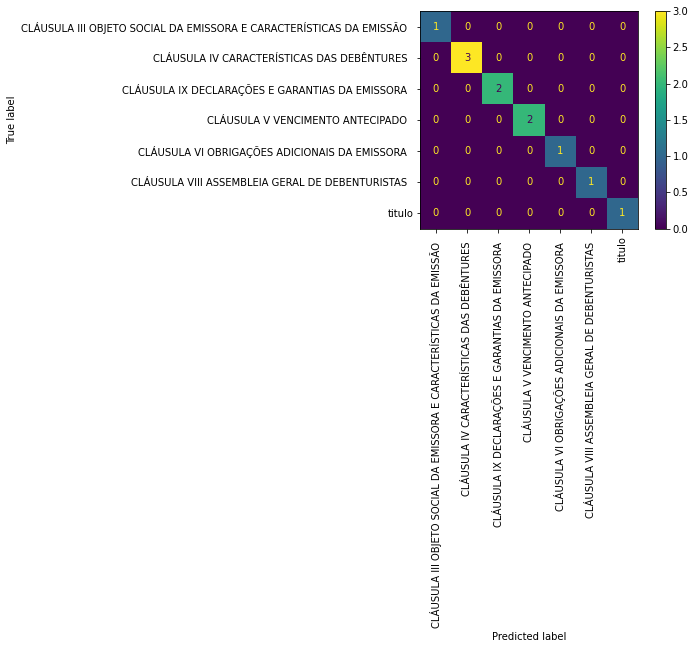

In [21]:
plot_confusion_matrix(text_clf, X_test, y_test)  
plt.xticks(rotation=90)
plt.show()

In [22]:
import PyPDF2

In [23]:
pdfFileObj = open('AALR_1_Escritura - Escritura_20170911_000.pdf', 'rb')

In [24]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [25]:
print(pdfReader.numPages)

50


In [26]:
for i in range (pdfReader.numPages):    
    pageObj = pdfReader.getPage(i)
    print(pageObj.extractText())
 

Junta Comercial do Estado de Minas GeraisCertifico registro sob o nº 6338127 em 05/10/2017 da Empresa CENTRO DE IMAGEM DIAGNOSTICOS S/A, Nire 31300096246 e protocolo174373716 - 14/09/2017. Autenticação: F592BF21C9A26E2F2DBDF66CE2188E28C9E1F0. Marinely de Paula Bomfim - Secretária-Geral. Paravalidar este documento, acesse http://www.jucemg.mg.gov.br e informe nº do protocolo 17/437.371-6 e o código de segurança Nnxt Esta cópia foiautenticada digitalmente e assinada em 05/10/2017 por Marinely de Paula Bomfim Œ Secretária-Geral.pág. 1/50
Junta Comercial do Estado de Minas GeraisCertifico registro sob o nº 6338127 em 05/10/2017 da Empresa CENTRO DE IMAGEM DIAGNOSTICOS S/A, Nire 31300096246 e protocolo174373716 - 14/09/2017. Autenticação: F592BF21C9A26E2F2DBDF66CE2188E28C9E1F0. Marinely de Paula Bomfim - Secretária-Geral. Paravalidar este documento, acesse http://www.jucemg.mg.gov.br e informe nº do protocolo 17/437.371-6 e o código de segurança Nnxt Esta cópia foiautenticada digitalmente e

In [27]:
pageObj.extractText()

'Junta Comercial do Estado de Minas GeraisCertifico registro sob o nº 6338127 em 05/10/2017 da Empresa CENTRO DE IMAGEM DIAGNOSTICOS S/A, Nire 31300096246 e protocolo174373716 - 14/09/2017. Autenticação: F592BF21C9A26E2F2DBDF66CE2188E28C9E1F0. Marinely de Paula Bomfim - Secretária-Geral. Paravalidar este documento, acesse http://www.jucemg.mg.gov.br e informe nº do protocolo 17/437.371-6 e o código de segurança Nnxt Esta cópia foiautenticada digitalmente e assinada em 05/10/2017 por Marinely de Paula Bomfim Œ Secretária-Geral.pág. 50/50'

In [28]:
from tika import parser

raw = parser.from_file("AALR_1_Escritura - Escritura_20170911_000.pdf")
raw = str(raw)

safe_text = raw.encode('utf-8', errors='ignore')

safe_text = str(safe_text).replace("\n", "").replace("\\", "")
print('--- safe text ---' )
print( safe_text )

--- safe text ---
b'{'metadata': {'Content-Type': 'application/pdf', 'Creation-Date': '2017-10-05T20:35:50Z', 'Last-Modified': '2017-10-05T20:35:53Z', 'Last-Save-Date': '2017-10-05T20:35:53Z', 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'X-TIKA:embedded_depth': '0', 'X-TIKA:parse_time_millis': '471', 'access_permission:assemble_document': 'true', 'access_permission:can_modify': 'true', 'access_permission:can_print': 'true', 'access_permission:can_print_degraded': 'true', 'access_permission:extract_content': 'true', 'access_permission:extract_for_accessibility': 'true', 'access_permission:fill_in_form': 'true', 'access_permission:modify_annotations': 'true', 'chaveSeguranca': 'Nnxt', 'created': '2017-10-05T20:35:50Z', 'dataAssinatura': '05/10/2017 17:35:50', 'date': '2017-10-05T20:35:53Z', 'dc:format': 'application/pdf; version=1.4', 'dcterms:created': '2017-10-05T20:35:50Z', 'dcterms: